In [2]:
import pickle

cifar_fea = {}
for i in range(10):
    # cifar_fea[i] = pickle.load(open(f'features_cub/features_saved/cifar_task_{i}.pkl', 'rb'))
    cifar_fea[i] = pickle.load(open(f'features_cub/cifar100_RAW_task_{i}_after9.pkl', 'rb'))
    fea_i, lab_i = cifar_fea[i]
    print('Task', i, lab_i.unique())


Task 0 tensor([ 1.,  9., 15., 41., 42., 50., 65., 70., 78., 91.], device='cuda:0')
Task 1 tensor([10., 37., 45., 48., 55., 56., 72., 73., 76., 92.], device='cuda:0')
Task 2 tensor([21., 26., 30., 32., 33., 49., 80., 83., 87., 96.], device='cuda:0')
Task 3 tensor([ 8., 12., 44., 47., 52., 59., 63., 74., 85., 98.], device='cuda:0')
Task 4 tensor([ 7., 18., 23., 34., 36., 39., 40., 60., 61., 66.], device='cuda:0')
Task 5 tensor([ 2., 16., 22., 38., 46., 51., 58., 62., 68., 99.], device='cuda:0')
Task 6 tensor([ 5.,  6., 19., 20., 24., 43., 67., 79., 82., 90.], device='cuda:0')
Task 7 tensor([ 0., 25., 53., 57., 71., 77., 84., 89., 93., 95.], device='cuda:0')
Task 8 tensor([ 4., 11., 27., 29., 54., 64., 69., 75., 88., 97.], device='cuda:0')
Task 9 tensor([ 3., 13., 14., 17., 28., 31., 35., 81., 86., 94.], device='cuda:0')


In [3]:
tree_ids = [52, 96, 59]
animal_ids = [36, 50, 55, 63]

In [16]:
import torch.nn as nn
import numpy as np
import sklearn
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import seaborn as sb
from glob import glob

def plot(x, colors, data_len):
  
        palette = np.array(sb.color_palette("hls", 97))  #Choosing color palette 

        # Create a scatter plot.
        f = plt.figure(figsize=(8, 8))
        ax = plt.subplot(aspect='equal')
        sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int32)])

        # Add the labels for each digit.
        txts = []
        for i in colors:
            # Position of each label.
            xtext, ytext = np.mean(x[colors == i, :], axis=0)
            txt = ax.text(xtext, ytext, str(int(i)), fontsize=15)
            txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
            txts.append(txt)
            
        # sc = ax.scatter(x[data_len:,0], x[data_len:,1], s=80, c='r', marker='x')
        return f, ax, txts
    
def viz_cluster(features, labels):        
        features = features.cpu().detach().numpy()
        labels = labels.cpu().detach().numpy()
        len_data = features.shape[0]
        data_all = features #np.vstack([features, centroids_])
        label_all = labels #np.hstacak([labels, labels_])
        tsneX = TSNE(perplexity=10, init='pca').fit_transform(data_all)
        f, ax, txts =  plot(tsneX, label_all, len_data)
        

In [4]:
import torch


Features = torch.empty(0).cuda()
Labels =  [] #torch.empty(0).cuda()

for i in range(10):
    fea_i, lab_i = cifar_fea[i]
    for j in range(len(lab_i)):
        # print(lab_i[j])
        # if True:
        if lab_i[j] in tree_ids or lab_i[j] in animal_ids:
            # print(fea_i[j].unsqueeze().shape)
            # exit()
            Features = torch.cat((Features, fea_i[j].unsqueeze(0)), dim=0)
            Labels.append(int(lab_i[j].item()))  #torch.cat((Labels, lab_i[j]), dim=0)
            # print('Accumulate', j, Features.shape[0])
            
# print(Labels)

In [6]:
Labels = torch.Tensor(Labels).long()
print(Features.shape, Labels.shape)

torch.Size([700, 768]) torch.Size([700])


In [7]:
print(Labels.unique())

tensor([36, 50, 52, 55, 59, 63, 96])


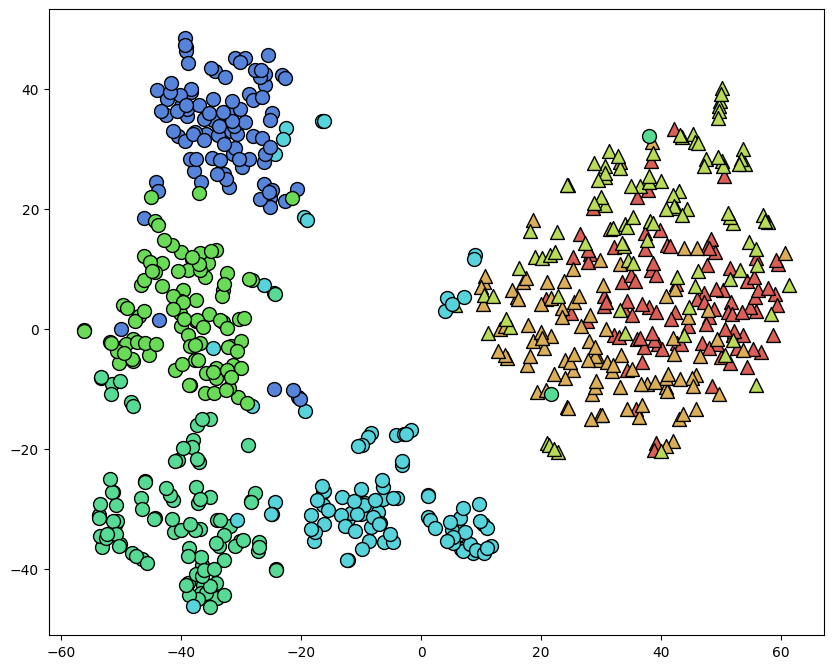

In [29]:

import torch.nn as nn
import numpy as np
import sklearn
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import seaborn as sb
from glob import glob

def plot(x, colors, data_len):
  
        palette = np.array(sb.color_palette("hls", 10))  #Choosing color palette 

        # Create a scatter plot.
        f = plt.figure(figsize=(10, 12))
        ax = plt.subplot(aspect='equal')
        
        
        label_map = {52:0, 96:1, 59:2, 50:3, 55:4, 63:5, 36:6}
        label_names = {52:'oak tree', 96: 'willow tree', 59: 'pine tree', 55:'otter', 63:'porcupine', 36:'hamster', 50:'mouse'}
        
        # sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int32)])
        # Plot each label with a distinct marker
        for i in label_names.keys():
            if i in tree_ids:
                plt.scatter(x[colors == i, 0], x[colors == i, 1], 
                        label=label_names[i], 
                        color=palette[label_map[i]], 
                        s=100, 
                        edgecolor='k', 
                        marker='^')
            elif i in animal_ids:
                plt.scatter(x[colors == i, 0], x[colors == i, 1], 
                        label=label_names[i], 
                        color=palette[label_map[i]], 
                        s=100, 
                        edgecolor='k', 
                        marker='o')    

        # Add the labels for each digit.
        # txts = []
        # for i in colors:
            # Position of each label.
            # xtext, ytext = np.mean(x[colors == i, :], axis=0)
            # txt = ax.text(xtext, ytext, str(int(i)), fontsize=15)
            # txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
            # txts.append(txt)
        #     plt.legend(title='Class name',fontsize=12, title_fontsize='13', loc='upper right')

            
        # sc = ax.scatter(x[data_len:,0], x[data_len:,1], s=80, c='r', marker='x')
        return f, ax #, txts
    
def viz_cluster(features, labels):        
        features = features.cpu().detach().numpy()
        labels = labels.cpu().detach().numpy()
        len_data = features.shape[0]
        data_all = features #np.vstack([features, centroids_])
        label_all = labels #np.hstacak([labels, labels_])
        tsneX = TSNE(perplexity=10, init='pca').fit_transform(data_all)
        f, ax =  plot(tsneX, label_all, len_data)
        
        f.savefig('tSNE.pdf',bbox_inches='tight')
        

viz_cluster(Features, Labels)

# tree_ids = [52, 47, 96, 59]
# animal_ids = [36, 19, 15, 55, 63]

In [8]:
print(Features.shape)

tree_ids = [52, 96, 59]
animal_ids = [36, 50, 55, 63]
# print(Labels)
RAW_Features = {}
j = 0
for i in tree_ids:
    # print(Labels == i)
    # exit()
    temp_f_i = Features[Labels == i]
    print(temp_f_i.shape)
    RAW_Features[j] = temp_f_i
    j += 1
    
for i in animal_ids:
    temp_f_i = Features[Labels == i]
    print(temp_f_i.shape)
    RAW_Features[j] = temp_f_i
    j +=1

torch.Size([700, 768])
torch.Size([100, 768])
torch.Size([100, 768])
torch.Size([100, 768])
torch.Size([100, 768])
torch.Size([100, 768])
torch.Size([100, 768])
torch.Size([100, 768])


In [9]:
print(RAW_Features.keys())
print(j)

dict_keys([0, 1, 2, 3, 4, 5, 6])
7


In [ ]:
import torch
import numpy as np
import ot

# Example: List of seven sets of feature vectors, converted to PyTorch tensors
feature_sets = RAW_Features
# print(feature_sets)

# Initialize a matrix to store Wasserstein distances
num_sets = len(feature_sets)
wasserstein_matrix = np.zeros((num_sets, num_sets))

# Compute the Wasserstein distance between each pair of sets
for i in range(num_sets):
    for j in range(i + 1, num_sets):
        # Convert PyTorch tensors to numpy arrays for POT
        
        X = feature_sets[i].cpu().numpy()
        # print
        Y = feature_sets[j].cpu().numpy()
    

        # Uniform weights for each feature vector in the sets
        a = np.ones((X.shape[0],)) / X.shape[0]
        b = np.ones((Y.shape[0],)) / Y.shape[0]

        # Compute the cost matrix (Euclidean distance between points)
        print(X.shape, Y.shape)
        M = ot.dist(X, Y)

        # Compute the Wasserstein distance
        distance = ot.emd2(a, b, M)

        # Store the distance in the matrix
        wasserstein_matrix[i, j] = distance
        wasserstein_matrix[j, i] = distance  # Symmetric matrix

print("Wasserstein Distance Matrix:")
print(wasserstein_matrix)

In [ ]:
cifar_fea_00 = pickle.load(open(f'features_cub/cifar100_RAW_task_{i}_after9.pkl', 'rb'))

In [ ]:
cifar_fea = {}
for i in range(10):
    # cifar_fea[i] = pickle.load(open(f'features_cub/features_saved/cifar_task_{i}.pkl', 'rb'))
    cifar_fea[i] = pickle.load(open(f'features_cub/cifar100_RAW_task_{i}_after9.pkl', 'rb'))
    fea_i, lab_i = cifar_fea[i]
    print('Task', i, lab_i.unique())

In [3]:
import numpy as np

def extract_values(G, index_list1, index_list2):
    return G[index_list1, index_list2]

# Example usage
G = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

index_list1 = [0, 2, 1]  # Row indices
index_list2 = [1, 2, 2]  # Column indices

values = extract_values(G, index_list1, index_list2)
print(values)

[2 9 6]
